Antall vellykkede deteksjoner: 9693 av 10000
Suksessrate: 96.93%


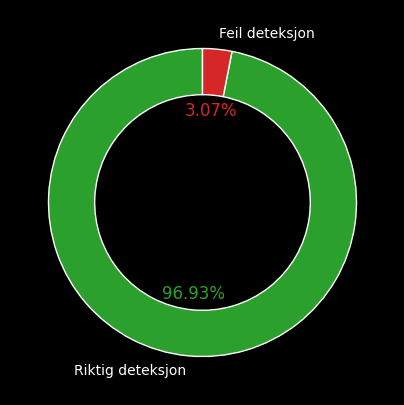

In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Definer access-koden
access_code_bits_str = '1101100111001110'
access_code_bits = np.array([int(bit) for bit in access_code_bits_str])
access_code = 2 * access_code_bits - 1  # Mapper 0 -> -1, 1 -> 1

# Simuleringsparametre
num_trials = 10000     # Antall forsøk
packet_length = 4096  # Lengde på random data
success_count = 0     # Teller hvor mange ganger vi klarer å finne riktig start

# Start Monte Carlo loop
for trial in range(num_trials):
    # Lag tilfeldig datastrøm
    random_bits = np.random.randint(0, 2, packet_length)
    random_code = 2 * random_bits - 1

    # Sett inn access-koden på tilfeldig posisjon
    start = np.random.randint(0, packet_length - len(access_code))
    random_code[start:start+len(access_code)] = access_code

    # Kjør krysskorrelasjon
    cross_corr = np.correlate(random_code, access_code, mode='full')
    max_cross_index = np.argmax(cross_corr)

    # Beregn estimert startposisjon
    lag_offset = len(access_code) - 1
    estimated_start = max_cross_index - lag_offset

    # Sjekk om vi fant riktig start
    if estimated_start == start:
        success_count += 1

# Resultater
success_rate = success_count / num_trials * 100
print(f"Antall vellykkede deteksjoner: {success_count} av {num_trials}")
print(f"Suksessrate: {success_rate:.2f}%")

# Valgfritt: Tegn en pie chart for suksess vs feiling
labels = ['Riktig deteksjon', 'Feil deteksjon']
sizes = [success_count, num_trials - success_count]
colors = ['tab:green', 'tab:red']

plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.2f%%',
    colors=colors, startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Sett farge på prosent-tekstene til samme som sektorene
for autotext, wedge in zip(autotexts, wedges):
    autotext.set_color(wedge.get_facecolor())

plt.setp(autotexts, size=12)
plt.savefig('Figurer/MonteCarloAccessCode.pdf', bbox_inches='tight')
plt.show()